Data Overview

In [1]:
import pandas as pd

# Load the dataset
data = pd.read_csv('/home/lili/Downloads/Telegram Desktop/data mining/tamrin 3/cleaned_data.csv')

# Display the first few rows of the data
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,1.051434,0,1,1,2,1,2.058363,1.110872,1,1
1,0,0.786070,0,0,1,3,0,2.058363,-0.082921,2,1
2,1,1.626390,0,1,1,2,0,0.148256,0.535043,2,1
3,0,0.255342,0,0,1,2,1,2.058363,0.801890,3,1
4,0,1.582163,1,0,1,3,0,2.058363,-0.658751,2,1


Data Splitting for Training and Testing

In [2]:
from sklearn.model_selection import train_test_split

# Separate features and target variable
X = data.drop('stroke', axis=1)
y = data['stroke']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Balancing Classes Using SMOTE

In [3]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to balance the classes in the training set
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

Creation and training of Ensemble method

In [4]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd

# Define base models
random_forest = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
gradient_boosting = GradientBoostingClassifier(n_estimators=100, random_state=42,learning_rate=0.1)

# Create VotingClassifier
voting_clf = VotingClassifier(
    estimators=[
        ('Random Forest', random_forest),
        ('Gradient Boosting', gradient_boosting)
    ],
    voting='soft' 
)
# Train the VotingClassifier
voting_clf.fit(X_resampled, y_resampled)


VotingClassifier(estimators=[('Random Forest',
                              RandomForestClassifier(class_weight='balanced',
                                                     random_state=42)),
                             ('Gradient Boosting',
                              GradientBoostingClassifier(random_state=42))],
                 voting='soft')

Model prediction and evaluation

In [5]:
# Make predictions
y_pred = voting_clf.predict(X_test)

Calculation of model accuracy and size metrics

In [6]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, output_dict=True)
confusion = confusion_matrix(y_test, y_pred)

# Store results in a DataFrame
voting_results = {
    "model": "VotingClassifier",
    "accuracy": accuracy,
    "precision_stroke": report['1']['precision'],
    "recall_stroke": report['1']['recall'],
    "f1_score_stroke": report['1']['f1-score'],
    "confusion_matrix": confusion
}

# Convert to DataFrame for better readability
voting_df = pd.DataFrame([voting_results])
print(voting_df)

              model  accuracy  precision_stroke  recall_stroke  \
0  VotingClassifier   0.84638          0.167832       0.387097   

   f1_score_stroke        confusion_matrix  
0         0.234146  [[841, 119], [38, 24]]  


In [7]:
print("Accuracy: {:.8f}".format(accuracy_score(y_test, y_pred)))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.84637965
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.88      0.91       960
           1       0.17      0.39      0.23        62

    accuracy                           0.85      1022
   macro avg       0.56      0.63      0.57      1022
weighted avg       0.91      0.85      0.87      1022



Confusion Matrix

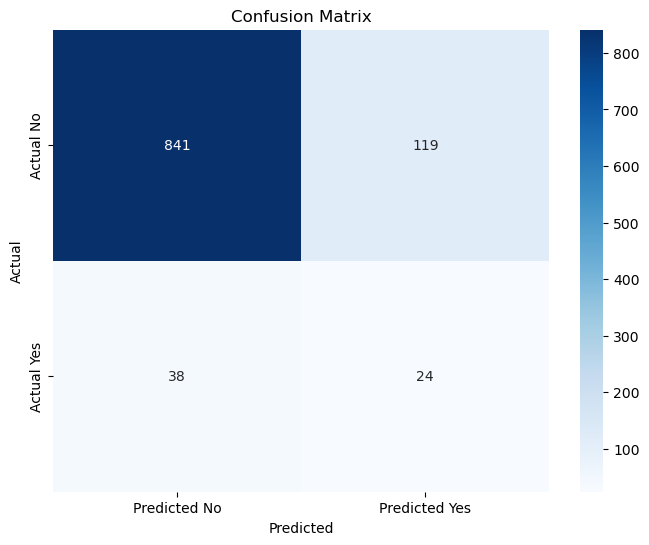

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns


conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted No', 'Predicted Yes'], yticklabels=['Actual No', 'Actual Yes'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()